# 1. Introduction
### 1.1 Client Background and Problem Statement

### 1.2 Project Goal

# 2. Data Comprehension
### 2.1 Data Collection

### Data explanation
We started with exploring economic, and policy measures and found several that the team felt could give insights congruent to the needs of the client. Below is the indicator name defintion, and dataframe that we will read into the notebook for exploration and manipulation
#### Target Variables
1. **Gross Domestic Product per capita (df_gdp)**_*[$US/Capita]* - Monetary value of all of the good and services produced within a contries borders - seen as a key indicator of economic health
3. **Poverty Score (df_cpi)**_*[%Population]*

#### Features
Some of the measures below are united nation assessments **Country Policy and Institutional Assessment** which evaluate a country's policy and intitutional framework

- **CPIA - Business Regulatory Assessment (df_reg)**_*[Rating 1-6]* - A united nations rating that assesses how conducive a countries policies are for private sector development (e.g. Ease of operating a business, Regulatory framework, Property rights)
- **CPIA - Gender Equity (df_gender)**_*[Rating 1-6]* - rating that measures the extent to which a country's policies promote gender equity and empower women
- **CPIA - Social Inclusion (df_social)**_*[Rating 1-6]*
- **CPIA - Transparency Accountabilty and Corruption (df_tac)**_*[Rating 1-6]*
- **CPIA - Public Resource Equity (df_pre)**_*[Rating 1-6]*
- **Health expenditures (df_health)**_*[%US/GDP]*
- **Trade Exports (df_trade, df_pop)**_*[%US/Population]*
- **Trade Imports (df_trade, df_pop)**_*[%US/Population]*
- **Ease of Doing Business (df_edb)**_*[Rating 0-100]*
- **Income Distribution (df_inc2q, df_inc3q, df_inc4q, df_ind5q, df_incT10)**_*[%Population]*
- **Education expenditures (df_edu)**_*[$US/GDP]*
- **Secondary education enrollment (df_college)**_*[%Population]*

In [33]:
#Libraries for data collection, manipulation, and exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Upload dataframes
- talk about the process of uploading the dfs so you can manipulate the data

In [34]:
#### Target Variables
df_gdp = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/GDP_per_cap_PPP.csv')
df_pov = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Poverty_Pct_Pop.csv')

#### CPIA
df_edb = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Ease_Doing_Business.csv')
df_reg = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Business_Regulation.csv')
df_gender = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Gender_Equity.csv')
df_pre = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Public_Resource_Equity.csv')
df_social = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Social_Inclusion.csv')
df_tac = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Transparency_Accountability_Corruption.csv')

#### Government Expenditures
df_health = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Health_Spend.csv')
df_edu = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Education_Spend.csv')

####  Financial
df_trade = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/Trade.csv')
df_inc2q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_2nd_quintile.csv')
df_inc3q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_3rd_quintile.csv')
df_inc4q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_4th_quintile.csv')
df_inc5q = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_5th_quintile.csv')
df_incT10 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/income_highest_10.csv')

#### Other
df_college = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/College_Enrollment.csv')
df_pop = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/population2.csv')


### 2.1 EDA - Exploratory Data Analysis and Cleaning

#### 2.1.a Data prep for Target variables
- how the df is structured
- what type of changes that need to be performed (unique versus previous)

In [35]:
'''
I know that i want to end up with a master dataframe with a index ordered by country then year
and columns of the various features mentioned above along with the three target variables
on the end of the table
Therefore for every df i will work to that end by
1. take an initial look at the data
2. address any missing values  - decided to do this after merging
3. strip white spaces 
4. drop any columns and rows that does not contribute to the study
5. reorganize standardize feature, level names, etc to merge seamlessly with other dfs moving forward
'''
##############  GDP Dataframe
df_gdp = df_gdp[['Country or Area', 'Year', 'Value']]  ########## Dropped a footnote column
df_gdp = df_gdp.applymap(lambda x: x.strip() if isinstance(x, str) else x)  ######### clean white space for all cells in table
df_gdp.columns = df_gdp.columns.str.strip()   ########## strip whitespace for the columns
df_gdp = df_gdp.rename(columns=str.lower) ######## make columns all lower case
df_gdp = df_gdp.rename(columns={'country or area': 'area', 'value': 'gdp'})    ############ change names to accomodate standardization moving forward
df_gdp['gdp'] = df_gdp['gdp'].round(2)  ################## round to two decimals
df_gdp['area'] = df_gdp['area'].astype(str)
#df_gdp

In [36]:
################ Repeat data prep for poverty measure
'''
df_pov has a makeup similar to df_gdp but it has footer that are not needed
starting below row 1011. i will also needed to get rid of footnotes column
'''
df_pov = df_pov.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_pov.columns = df_pov.columns.str.strip()
df_pov = df_pov[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_pov = df_pov.rename(columns={'Country or Area': 'Area', 'Value': '%pov'}) ############## rename for std
df_pov = df_pov.rename(columns=str.lower)   ############# make all lower case for std
df_pov = df_pov.iloc[:1012, :]  ################## get rid of the footer
df_pov['year'] = df_pov['year'].astype(int)
#df_pov

#### Data prep for UN Assessment related Feature variables
- how the df is structured
- what type of changes that need to be performed (unique versus previous)

In [37]:
############### Repeat data prep for CPIA variables
''' CPIA_BUSINESS REGULATION'''
df_reg = df_reg.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_reg.columns = df_reg.columns.str.strip()
df_reg = df_reg[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_reg = df_reg.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_regulation'}) ############## rename for std
df_reg = df_reg.rename(columns=str.lower)   ############# make all lower case for std
#df_reg

''' CPIA_GENDER EQUITY'''
df_gender = df_gender.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_gender.columns = df_gender.columns.str.strip()
df_gender = df_gender[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_gender = df_gender.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_gender'}) ############## rename for std
df_gender = df_gender.rename(columns=str.lower)   ############# make all lower case for std
#df_gender

''' CPIA_PUBLIC RESOURCE EQUITY'''
df_pre = df_pre.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_pre.columns = df_pre.columns.str.strip()
df_pre = df_pre[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_pre = df_pre.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_resources'}) ############## rename for std
df_pre = df_pre.rename(columns=str.lower)   ############# make all lower case for std
#df_pre

''' CPIA_TRANSPARENCY ACCOUNTABILITY AND CORRUPTON'''
df_tac = df_tac.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_tac.columns = df_tac.columns.str.strip()
df_tac = df_tac[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_tac = df_tac.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_transparency'}) ############## rename for std
df_tac = df_tac.rename(columns=str.lower)   ############# make all lower case for std
#df_tac

''' CPIA_SOCIAL INCLUSION'''
df_social = df_social.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_social.columns = df_social.columns.str.strip()
df_social = df_social[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_social = df_social.rename(columns={'Country or Area': 'Area', 'Value': 'cpia_inclusion'}) ############## rename for std
df_social = df_social.rename(columns=str.lower)   ############# make all lower case for std
#df_social


#### Data prep for Feature variables Healthcare, Education, and Business Ease
- how the df is structured
- what type of changes that need to be performed (unique versus previous)

In [38]:
############## repeat data prep for ease of doing business along with govenmental expenditure variables
''' EASE OF DOING BUSINESS '''
df_edb = df_edb.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_edb.columns = df_edb.columns.str.strip()
df_edb = df_edb[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_edb = df_edb.rename(columns={'Country or Area': 'Area', 'Value': 'business_ease'}) ############## rename for std
df_edb = df_edb.rename(columns=str.lower)   ############# make all lower case for std
#df_edb

''' GOVERNMENT EXPENDITURES FOR HEALTHCARE '''
df_health.columns = df_health.iloc[0]           ########## resets the column to be the first row
df_health = df_health[1:].reset_index(drop=True)  
df_health = df_health.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_health.columns = df_health.columns.str.strip()
df_health.columns.values[1] = 'area'  ########## replace a NaN with area
df_health = df_health[df_health['Series'].str.startswith('Current')].reset_index(drop=True)
df_health = df_health[['area', 'Year', 'Value']]  ########### drop footnote
df_health = df_health.rename(columns={'Value': 'healthcare$'}) ############## rename for std
df_health = df_health.rename(columns=str.lower)   ############# make all lower case for std
df_health['year'] = df_health['year'].astype(int)
df_health['healthcare$'] = df_health['healthcare$'].astype(float)
#df_health

''' GOVERNMENT EXPENDITURES FOR EDUCATION - different column names than other dfs'''
df_edu = df_edu.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_edu.columns = df_edu.columns.str.strip()
df_edu = df_edu[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_edu = df_edu.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'education$'}) ############## rename for std
df_edu = df_edu.rename(columns=str.lower)   ############# make all lower case for std
#df_edu

''' College Enrollment - was setup similar to df_edu'''
df_college = df_college.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_college.columns = df_college.columns.str.strip()
df_college = df_college[df_college['Sex'].str.startswith('All')].reset_index(drop=True)
df_college = df_college[['Reference Area', 'Time Period', 'Observation Value']]  ########### drop footnote
df_college = df_college.rename(columns={'Reference Area': 'Area', 'Time Period': 'Year', 'Observation Value': 'coll_enrollment'}) ############## rename for std
df_college = df_college.rename(columns=str.lower)   ############# make all lower case for std
#df_college


#### Data prep for Income related Feature variables
- how the df is structured
- what type of changes that need to be performed (unique versus previous)

In [39]:
########################### repeat data prep for income distribution
''' 2ND QUINTILE OF INCOME DISTRIBUTION'''
df_inc2q = df_inc2q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc2q.columns = df_inc2q.columns.str.strip()
df_inc2q = df_inc2q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc2q = df_inc2q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile2'}) ############## rename for std
df_inc2q = df_inc2q.rename(columns=str.lower)   ############# make all lower case for std
df_inc2q = df_inc2q.iloc[:2007, :] ################## get rid of footer
#df_inc2q

''' 3RD QUINTILE OF INCOME DISTRIBUTION'''
df_inc3q = df_inc3q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc3q.columns = df_inc3q.columns.str.strip()
df_inc3q = df_inc3q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc3q = df_inc3q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile3'}) ############## rename for std
df_inc3q = df_inc3q.rename(columns=str.lower)   ############# make all lower case for std
df_inc3q = df_inc3q.iloc[:2007, :] ################## get rid of footer
#df_inc3q

''' 4TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc4q = df_inc4q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc4q.columns = df_inc4q.columns.str.strip()
df_inc4q = df_inc4q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc4q = df_inc4q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile4'}) ############## rename for std
df_inc4q = df_inc4q.rename(columns=str.lower)   ############# make all lower case for std
df_inc4q = df_inc4q.iloc[:2007, :] ################## get rid of footer
#df_inc4q

''' 5TH QUINTILE OF INCOME DISTRIBUTION'''
df_inc5q = df_inc5q.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_inc5q.columns = df_inc5q.columns.str.strip()
df_inc5q = df_inc5q[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_inc5q = df_inc5q.rename(columns={'Country or Area': 'Area', 'Value': 'income_quintile5'}) ############## rename for std
df_inc5q = df_inc5q.rename(columns=str.lower)   ############# make all lower case for std
df_inc5q = df_inc5q.iloc[:2007, :] ################## get rid of footer
#df_inc5q

''' TOP 10 PERCENT OF INCOME DISTRIBUTION'''
df_incT10 = df_incT10.applymap(lambda x: x.strip() if isinstance(x, str) else x)   ######### strip wp
df_incT10.columns = df_incT10.columns.str.strip()
df_incT10 = df_incT10[['Country or Area', 'Year', 'Value']]  ########### drop footnote
df_incT10 = df_incT10.rename(columns={'Country or Area': 'Area', 'Value': 'income_top10%'}) ############## rename for std
df_incT10 = df_incT10.rename(columns=str.lower)   ############# make all lower case for std
df_incT10 = df_incT10.iloc[:2007, :] ################## get rid of footer
#df_incT10

''' MERGE ALL OF THE SEPERATE INCOME DFS INTO ONE DF'''
df_income = pd.merge(df_inc2q, df_inc3q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc4q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_inc5q, on=['area', 'year'], how='inner')
df_income = pd.merge(df_income, df_incT10, on=['area', 'year'], how='inner')

''' CREATE A NEW COLUMN FOR THE MIDDLE 60% AND DIFFERANCE BETWEEN TOP10% AND MIDDLE 60% '''
df_income['income_middle60%'] = df_income['income_quintile2'] + df_income['income_quintile3'] + df_income['income_quintile4']  ########### this is attempting to approximate the  size of middle class
df_income['income_difference_top-mid60'] = df_income['income_top10%'] - df_income['income_middle60%']   ###################### this is attempting to approximate this gap between the most wealthy and middle
df_income['year'] = df_income['year'].astype(int)
#df_income

#### Data prep for Trade related Feature variables
- how the df is structured
- what type of changes that need to be performed (unique versus previous)

In [40]:
'''   CREATE A POPULATION TABLE TO LATER CALCULATE TRADE VALUES PER CAPITA'''
################# configure population by area, year, poplulation congruent to other dfs
df_pop.columns = df_pop.iloc[3]            ################# assign header and reslice appropriate area
df_pop = df_pop[4:].reset_index(drop=True)
df_pop = df_pop.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])   ################## Drop unneeded columns
df_pop2 = df_pop.melt(id_vars=['Country Name'], var_name='year', value_name='population')  ################ Use melt function to stack year and pop along side area
df_pop2['year'] = df_pop2['year'].astype(int)   
df_pop2 = df_pop2.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_pop2 = df_pop2.rename(columns={'Country Name': 'area'})
df_pop2['population'] = df_pop2['population'] / 1000000   ################### align unit of measure to later create accurate import/ exports per capita
#df_pop2

'''  CREATE IMPORT AND EXPORT DFS'''
df_trade.columns = df_trade.iloc[0]   ################# assign header and reslice appropriate area
df_trade = df_trade[1:].reset_index(drop=True)
df_trade.columns.values[1] ='area'
df_trade = df_trade[['area', 'Year', 'Series', 'Value']]   ########### drop unneeded columns

######### IMPORTS
df_imports = df_trade[df_trade['Series'].str.contains(r'Imports CIF', na=False, regex=True)]  ############## pull out import related rows for import df
df_imports = df_imports.rename(columns={'Value': 'import$'})
df_imports = df_imports.rename(columns=str.lower)
df_imports = df_imports.drop(columns=['series'])
df_imports['import$'] = df_imports['import$'].str.replace(',', '').astype(float)   ########### get rid of commas to make astype float
df_imports['year'] = df_imports['year'].astype(int)

######## EXPORTS
df_exports = df_trade[df_trade['Series'].str.contains(r'Exports FOB', na=False, regex=True)] ############### pull out export related rows for export df
df_exports = df_exports.rename(columns={'Value': 'export$'})
df_exports = df_exports.rename(columns=str.lower)
df_exports = df_exports.drop(columns=['series'])
df_exports['export$'] = df_exports['export$'].str.replace(',', '').astype(float)
df_exports['year'] = df_exports['year'].astype(int)

''' MERGE TRADE DFS WITH POPULATION TO CREATE A TRADE PER CAPITA DF'''
df_trade2 = pd.merge(df_imports, df_exports, on=['area', 'year'], how='inner')
df_trade2 = pd.merge(df_trade2, df_pop2, on=['area', 'year'], how='inner')

df_trade2['import_capita'] = df_trade2['import$'] / df_trade2['population']   ################ create a column for import export per capita
df_trade2['export_capita'] = df_trade2['export$'] / df_trade2['population']

df_trade2 = df_trade2[['area', 'year', 'import_capita', 'export_capita']]      ############ drop unneeded columns
#df_trade2

#### Obervations about variables to include/discard
- missing data
- decisions based on the observations above
- Reviewed variation in range of years collected for study variables [Review Range of Years Collected](https://raw.githubusercontent.com/te-ex153/Data/main/range_years.pnghttps://raw.githubusercontent.com/te-ex153/Data/main/range_years.png)
- decisions based on the observations above

In [41]:
'''
Differnences in area names accross the different dataframes were observered. Also,
there are names of regions that comprise of countries listed seperately which is a redundancy.
A comparision of areas across all study variables is needed to determine which area names
to keep for the study
'''
########### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

########## create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

########### merge all areas with each df alligned
compare_areas = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

########## get rid of the 'areas' column
compare_areas = compare_areas[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

########## create a column which captures ea rows unique string(area name)
compare_areas['unique_name'] = compare_areas.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
#compare_areas.to_csv('compare_areas.csv', index=False)

#### Matrix Observations
- discussion about duplicates, non regional catagories, aggregate country catagories - [Compare Countries](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fcompare_areas.xlsx&wdOrigin=BROWSELINK)- looked at country list for all variables to find inconsistencies - [Compare Countries](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fraw.githubusercontent.com%2Fte-ex153%2FData%2Frefs%2Fheads%2Fmain%2Fcompare_areas.xlsx&wdOrigin=BROWSELINK)

In [42]:
import re

########### Create the re search criteria to find then remove duplicate names
regex_dict = {
    r'^Bolivia': 'Bolivia',
    r'^C.*voire$':'Ivory Coast',
    r'^Czech': 'Czech Republic',
    r'^Dem.*ongo$': 'D.R. Congo',
    r'Hong\sKong': 'Hong Kong',
    r'Iran': 'Iran',
    r'Korea': 'Korea',
    r'Lao\sP': 'Lao',
    r'^Libya': 'Libya',
    r'^Macao': 'Macao',
    r'Micronesia': 'Micronesia',
    r'Netherlands': 'Netherlands',
    r'Russia': 'Russia',
    r'^T.*iye$|Turkey': 'Turkiye',
    r'^Tanzania': 'Tanzania',
    r'United\sKingdom': 'United Kingdom',
    r'United\sStates': 'United States',
    r'Venezuela': 'Venezuela',
    r'^S.*Principe$': 'Sao Tome and Principe',
    r'^Kyrgyz': 'Kyrgyzstan',
    r'Gambia': 'Gambia'
}

#Function to standardize names
def standardize_country(name, regex_dict):
    for pattern, standard_name in regex_dict.items():
        if re.match(pattern, name):
            return standard_name
    return name


##############  update the names with the function (confirmed it was working with df['area2'] before rolling to all dfs)
df_reg['area'] = df_reg['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gender['area'] = df_gender['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pre['area'] = df_pre['area'].apply(lambda x: standardize_country(x, regex_dict))
df_tac['area'] = df_tac['area'].apply(lambda x: standardize_country(x, regex_dict))
df_social['area'] = df_social['area'].apply(lambda x: standardize_country(x, regex_dict))
df_health['area'] = df_health['area'].apply(lambda x: standardize_country(x, regex_dict))
df_edu['area'] = df_edu['area'].apply(lambda x: standardize_country(x, regex_dict))
df_college['area'] = df_college['area'].apply(lambda x: standardize_country(x, regex_dict))
df_income['area'] = df_income['area'].apply(lambda x: standardize_country(x, regex_dict))
df_trade2['area'] = df_trade2['area'].apply(lambda x: standardize_country(x, regex_dict))
df_gdp['area'] = df_gdp['area'].apply(lambda x: standardize_country(x, regex_dict))
df_pov['area'] = df_pov['area'].apply(lambda x: standardize_country(x, regex_dict))

##### Repeat the previous step to confirm changes were made to plan

In [43]:
'''
Differnences in area names accross the different dataframes were observered. Also,
there are names of regions that comprise of countries listed seperately which is a redundancy.
A comparision of areas across all study variables is needed to determine which area names
to keep for the study
'''
########### create a unique set of coutry/areas for each df
areas_reg = df_reg[['area']].rename(columns={'area':'reg'}).drop_duplicates()  
areas_gen = df_gender[['area']].rename(columns={'area':'gen'}).drop_duplicates()
areas_pre = df_pre[['area']].rename(columns={'area':'pre'}).drop_duplicates()
areas_tac = df_tac[['area']].rename(columns={'area':'tac'}).drop_duplicates()
areas_soc = df_social[['area']].rename(columns={'area':'soc'}).drop_duplicates()
areas_hea = df_health[['area']].rename(columns={'area': 'hea'}).drop_duplicates()
areas_edu = df_edu[['area']].rename(columns={'area': 'edu'}).drop_duplicates()
areas_col = df_college[['area']].rename(columns={'area': 'col'}).drop_duplicates()
areas_inc = df_income[['area']].rename(columns={'area': 'inc'}).drop_duplicates()
areas_tra = df_trade2[['area']].rename(columns={'area': 'tra'}).drop_duplicates()
areas_gdp = df_gdp[['area']].rename(columns={'area':'gdp'}).drop_duplicates()
areas_pov = df_pov[['area']].rename(columns={'area':'pov'}).drop_duplicates()

########## create a master list of all unique areas
all_areas = pd.DataFrame({'area': pd.concat([areas_reg['reg'], areas_gen['gen'], areas_pre['pre'], \
                                            areas_tac['tac'], areas_soc['soc'], areas_hea['hea'], \
                                            areas_edu['edu'], areas_col['col'], areas_inc['inc'], \
                                            areas_tra['tra'], areas_gdp['gdp'], areas_pov['pov']]).drop_duplicates()})

########### merge all areas with each df alligned
compare_areas2 = all_areas \
.merge(areas_reg, left_on='area', right_on='reg', how='left') \
.merge(areas_gen, left_on='area', right_on='gen', how='left') \
.merge(areas_pre, left_on='area', right_on='pre', how='left') \
.merge(areas_tac, left_on='area', right_on='tac', how='left') \
.merge(areas_soc, left_on='area', right_on='soc', how='left') \
.merge(areas_hea, left_on='area', right_on='hea', how='left') \
.merge(areas_edu, left_on='area', right_on='edu', how='left') \
.merge(areas_col, left_on='area', right_on='col', how='left') \
.merge(areas_inc, left_on='area', right_on='inc', how='left') \
.merge(areas_tra, left_on='area', right_on='tra', how='left') \
.merge(areas_gdp, left_on='area', right_on='gdp', how='left') \
.merge(areas_pov, left_on='area', right_on='pov', how='left')

########## get rid of the 'areas' column
compare_areas2 = compare_areas2[['reg', 'gen', 'pre', 'tac', 'soc','hea', 'edu', 'col', 'inc', 'tra','gdp', 'pov']]

########## create a column which captures ea rows unique string(area name)
compare_areas2['unique_name'] = compare_areas2.apply(lambda row: row.dropna().iloc[0] if not row.dropna().empty else np.nan, axis=1)
######### save to csv for review
compare_areas2.to_csv('compare_areas2.csv', index=False)

#### Creating a Master Dataset
- confirm above changes were to plan
- approach to merging

In [44]:
################ Merge all of the dfs
'''
the df_gdp is the most significant df, since im not interested in any feature that 
does not measure gdp also df_gdp happens to have the widest range in years in 
which i will later truncate. based on this i will merge all other dfs to gdp
'''
df_economy = pd.merge(df_gdp, df_pov, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_reg, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_gender, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_pre, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_tac, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_social, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_health, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_edu, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_college, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_income, on=['area', 'year'], how='left')
df_economy = pd.merge(df_economy, df_trade2, on=['area', 'year'], how='left')

df_economy = df_economy.sort_values(by=['area', 'year']).reset_index(drop=True)

############### Remove sparse years from dataset
'''
I reviewed each dataset against the years in which data was being collected
again giving priority to gdp since that is the primary target variable. The years
between 2000 and 2020 give the dataset the densest table vs the feature variables
fig is attached
'''
df_economy = df_economy[df_economy['year'].between(2000, 2022)].reset_index(drop=True)

df_economy.to_csv('df_economy.csv', index=False)

### 2.2 Graphic Analysis and Data Transformation

#### 2.2a Target Variables Graphical Review

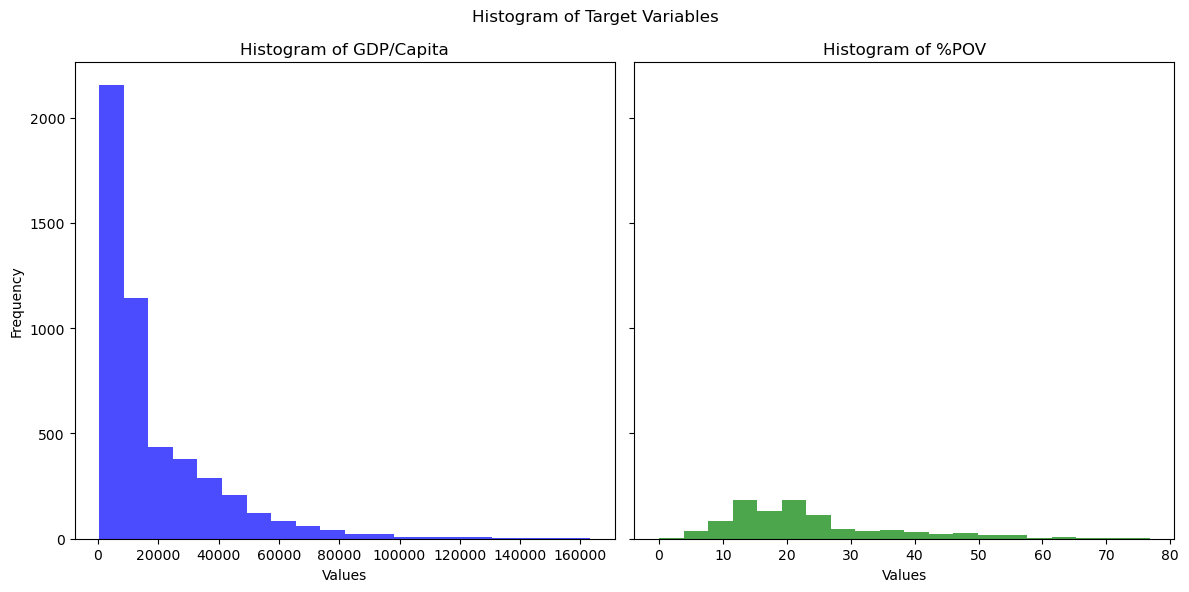

In [45]:
df_economy2 = pd.read_csv('https://raw.githubusercontent.com/te-ex153/Data/refs/heads/main/df_economy2.csv')

import seaborn as sns
import matplotlib.pyplot as plt

###### create a figure and axis objects
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

####### plot histogram for GDP
ax[0].hist(df_economy2['gdp'], bins=20, color='blue', alpha=0.7)
ax[0].set_title(f'Histogram of GDP/Capita')
ax[0].set_xlabel('Values')
ax[0].set_ylabel('Frequency')

####### plot histogram for %POV
ax[1].hist(df_economy2['%pov'], bins=20, color='green', alpha=0.7)
ax[1].set_title(f'Histogram of %POV')
ax[1].set_xlabel('Values')

fig.suptitle('Histogram of Target Variables')

plt.tight_layout()
plt.show()

Figure ID and description

#### 2.2b Graphical Review of Feature Variables (CPIA Variables)

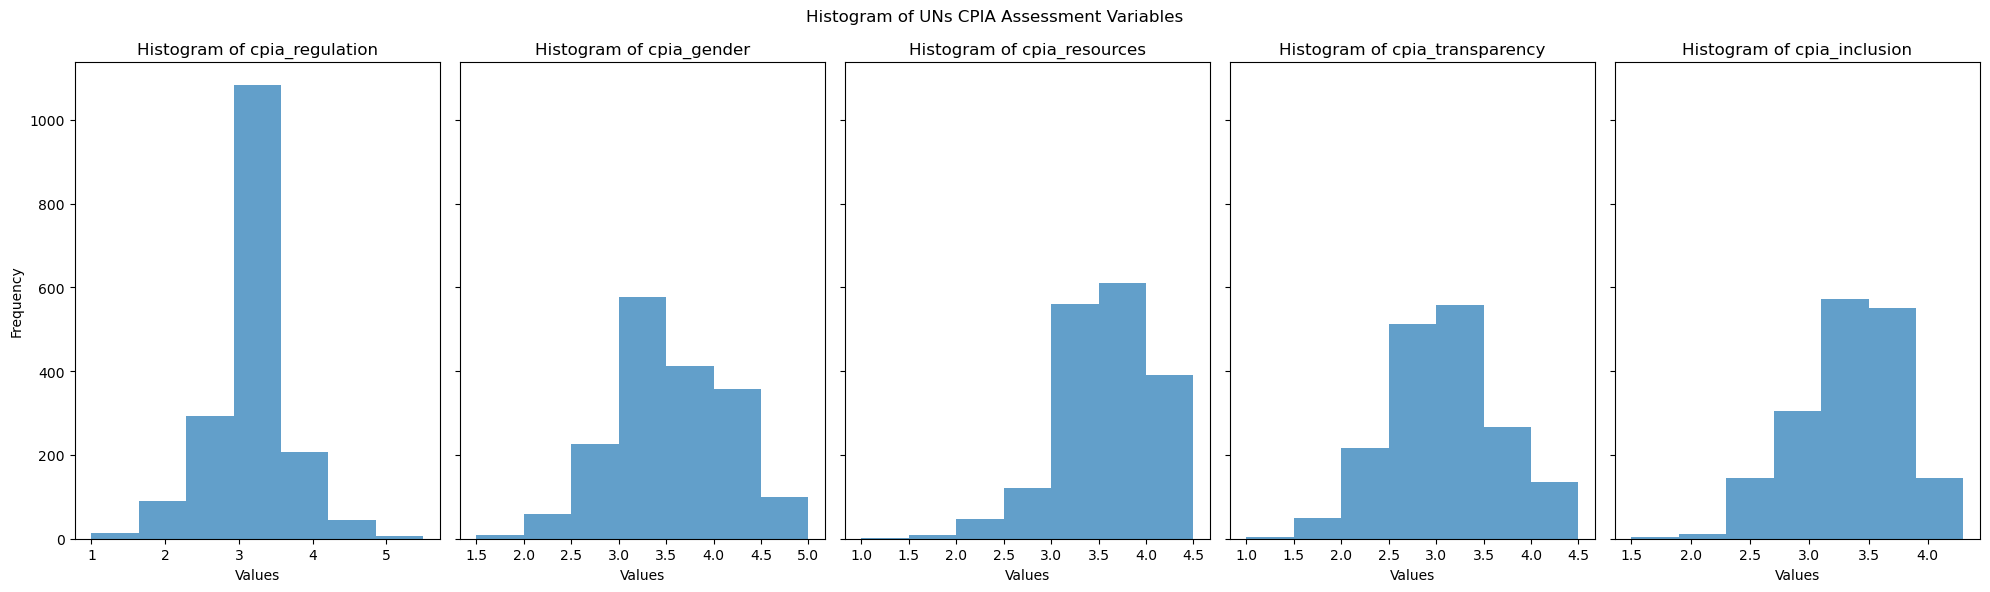

In [46]:
###### create a figure and axis objects
cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion']

fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=7, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Histogram of UNs CPIA Assessment Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

Figure ID and description

#### 2.2c Graphical Review of Feature Variables (Healthcare and Education)

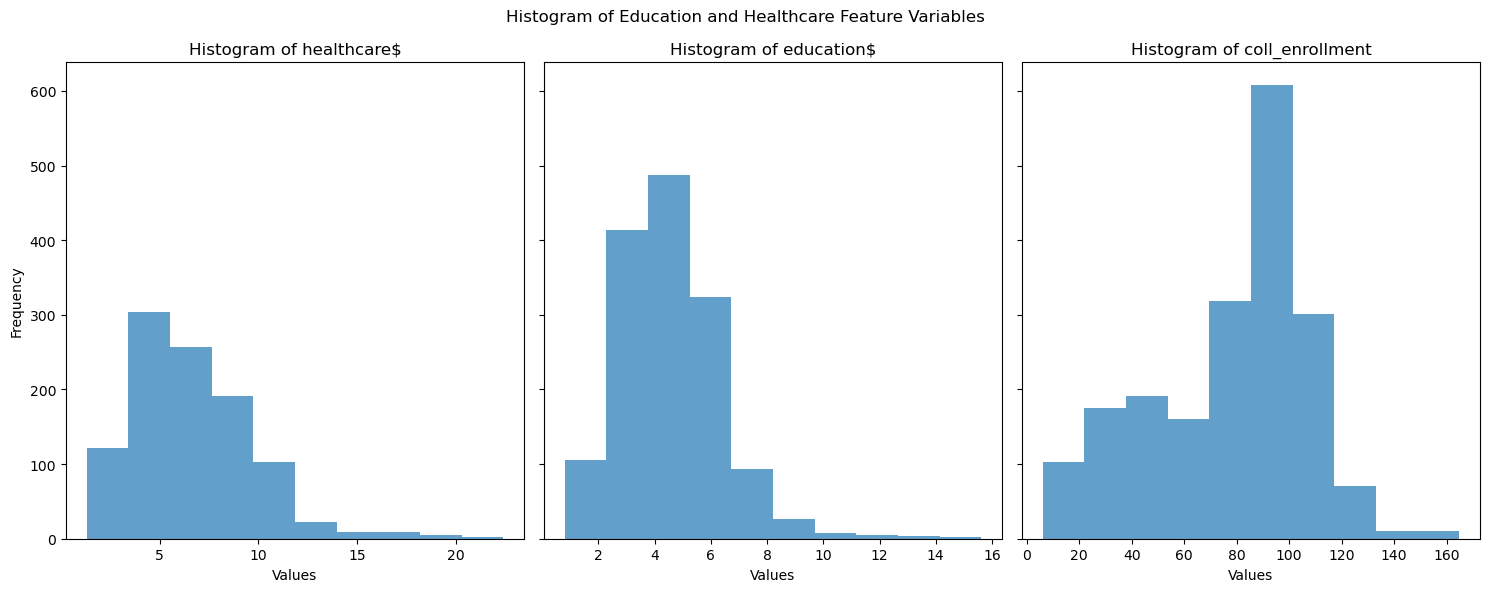

In [47]:
# create a column of variables you want to graph
cols = ['healthcare$', 'education$', 'coll_enrollment']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Histogram of Education and Healthcare Feature Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

Figure ID and description

#### 2.2d Graphical Review of Feature Variables (Income Distribution)

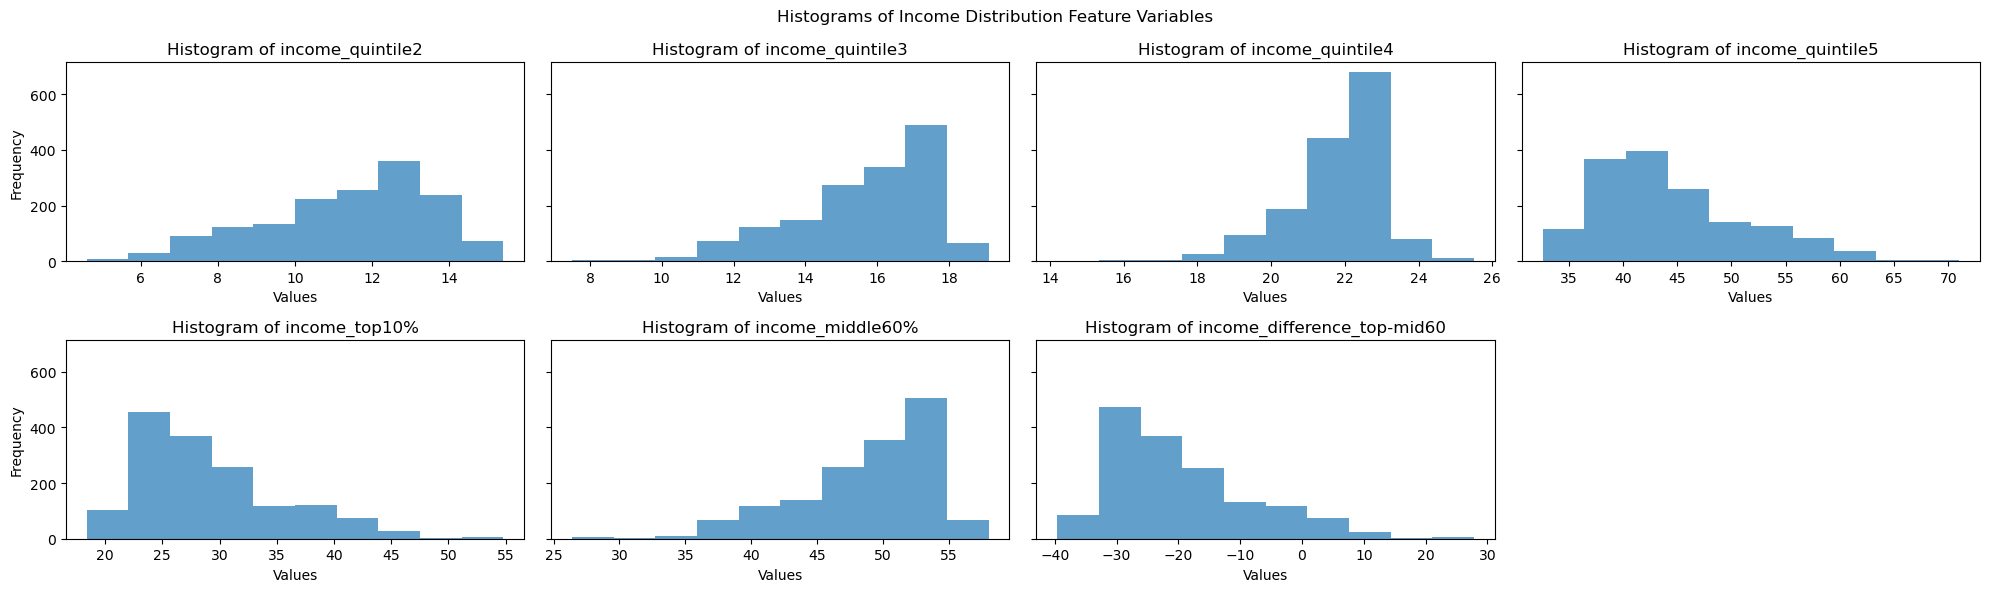

In [48]:
# create a column of variables you want to graph
cols = ['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60']

###### create a figure and axis objects
fig, axes = plt.subplots(2, 4, figsize=(20, 6), sharey=True)

####### Flatten the axes array for easy iteration
axes = axes.flatten()

######## plot the histogram for each columns
for i, col in enumerate(cols):
    if i < len(axes):
        axes[i].hist(df_economy2[col], bins=10, alpha=0.7)
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel('Values')
        if i % 4 == 0:  ##### Only set ylabel for the first histogram in each row
            axes[i].set_ylabel('Frequency')
            
####### hide any unused subplots
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

########## Add a main title
fig.suptitle('Histograms of Income Distribution Feature Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

Figure ID and description

#### 2.2d Graphical Review of Feature Variables (Import and Export Value)

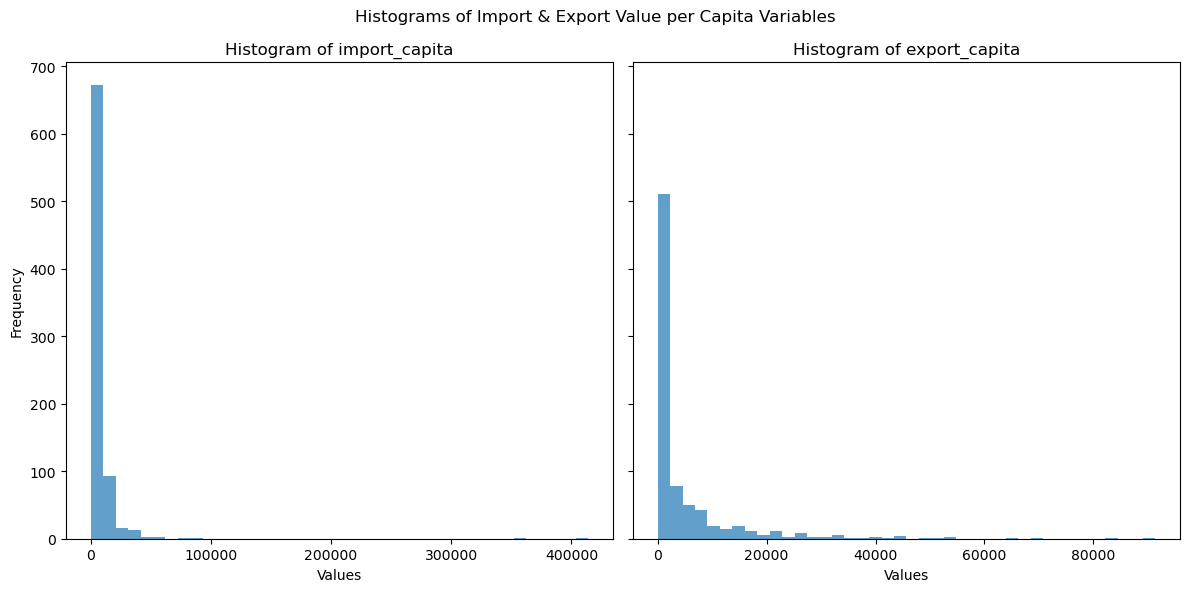

In [49]:
# create a column of variables you want to graph
cols = ['import_capita', 'export_capita']

###### create a figure and axis objects
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

######## plot the histogram for each columns
for i, col in enumerate(cols):
    axes[i].hist(df_economy2[col], bins=40, alpha=0.7)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel('Values')
    if i == 0:
        axes[i].set_ylabel('Frequency')
        
########## Add a main title
fig.suptitle('Histograms of Import & Export Value per Capita Variables')

########## Ensure the layout fits well
plt.tight_layout()
plt.show()

Figure ID and description

#### Grapical Analysis Observations
1. give observations section by section
2. give overall observations of the data
3. state decisions that come with observations

#### Missing values
- talk about the importance of dealing with missing values
- talk about approach to deal with missing values based on concerns and graphical obervations

In [50]:
cols = df_economy2.loc[:, 'cpia_regulation':'export_capita']
feature_all_nan = cols.isna().all(axis=1).sum()
print(f'Number of rows where there was no feature information before drop : {feature_all_nan}')

Number of rows where there was no feature information before drop : 769


In [51]:
### Drop all rows that dont have featue info
df_economy2 = df_economy2[~cols.isna().all(axis=1)]
cols2 = df_economy2.loc[:, 'cpia_regulation':'export_capita']
confirm_drop = cols2.isna().all(axis=1).sum()
print(f'Confirmation -- Number of rows where there was no feature information after drop : {confirm_drop}')

Confirmation -- Number of rows where there was no feature information after drop : 0


In [52]:
nan_counts = df_economy2.isna().sum()
print(nan_counts)
df_economy2.to_csv('df_economy3.csv', index=False)

area                              0
year                              0
gdp                               0
%pov                           3241
cpia_regulation                2497
cpia_gender                    2497
cpia_resources                 2497
cpia_transparency              2497
cpia_inclusion                 2502
healthcare$                    3211
education$                     2768
coll_enrollment                2288
income_quintile2               2703
income_quintile3               2703
income_quintile4               2703
income_quintile5               2703
income_top10%                  2703
income_middle60%               2703
income_difference_top-mid60    2703
import_capita                  3434
export_capita                  3434
dtype: int64


#### Missing Data Decisions
- Target Variable __(gdp)__ - Has no missing variables not. ***No action needed***
- Target Variable __(%pov)__ - Has significantly less information than gdp, therefor ***Separation into its own dataset preserves the most information for this target variable***
- Feature __(cpia_regulation)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_gender)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_resources)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_transparency)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(cpia_inclusion)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(healthcare)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(education)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(coll_enrollment)__ - Figure x shows the distribution is more normal than not, so ***Imputing the mean for missing values will be the approach***
- Feature __(income related features)__ - Figure x shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***
- Feature __(import_capita)__ - Figure x shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***
- Feature __(Export_capita)__ - Figure x shows the distribution is more skewed than normal, so ***Imputing the median for missing values will be the approach***

These aterations/transformation will be performed after the collinearity analysis for efficiency and complexity purposes

#### 2.2f Collinearity Analysis
1. talk about why it is important to check for correlation between variables
1. talk about the criteria for determining correlation and the approach of the heatmap

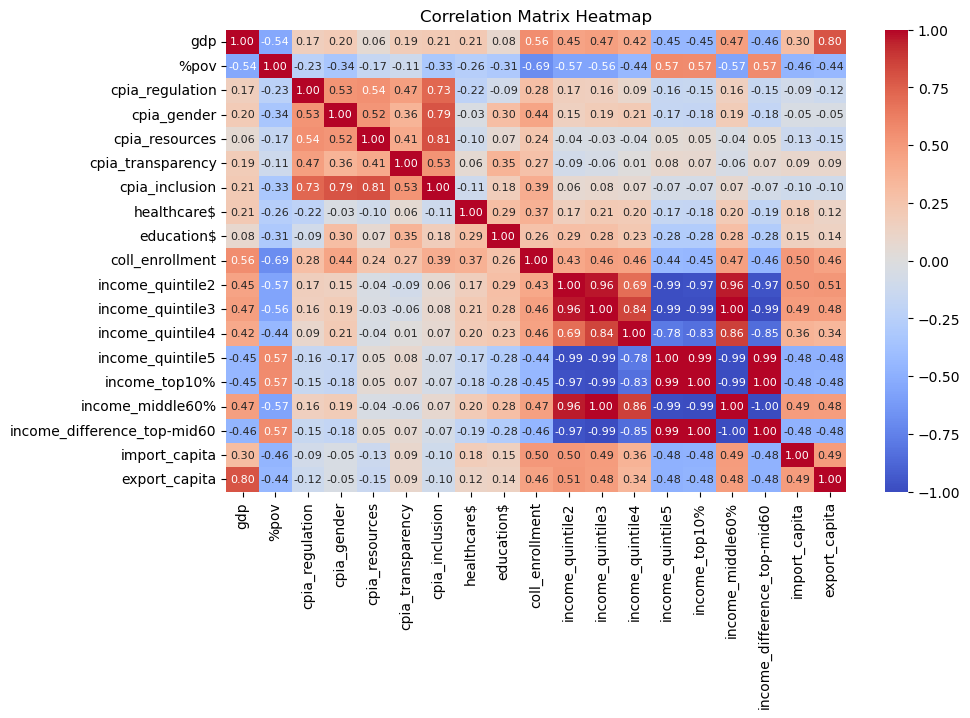

In [53]:

########## create a list of the variables to analyze
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment',
       'income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_middle60%', 'income_difference_top-mid60', 'import_capita', 'export_capita']

###### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy2[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')
plt.show()

Figure ID and description

#### Correlation Analysis observation
1. observations about the above graph
2. decison based on observations

#### Drop Colinear Related Feature variables

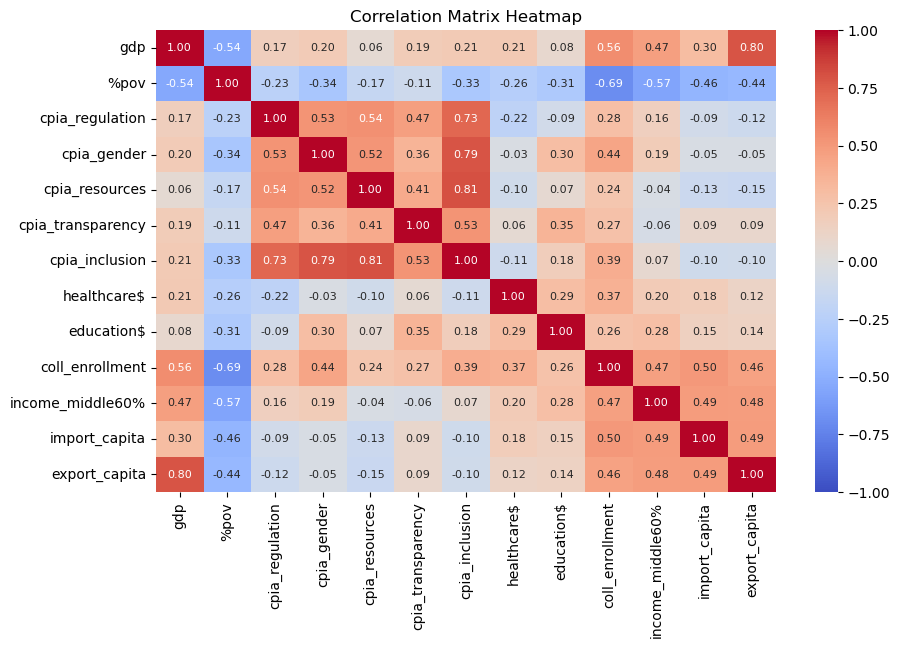

In [54]:
############## drop redundant variables
df_economy3 = df_economy2.drop(columns=['income_quintile2', 'income_quintile3', 'income_quintile4', 'income_quintile5', 'income_top10%', 'income_difference_top-mid60'])
#df_economy3


############### repeat updated correlation heatmap
cols = ['gdp','%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment', 
        'income_middle60%', 'import_capita', 'export_capita']

###### create a correlation matrix of econ variables
correlation_matrix_econ = df_economy3[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_econ, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')
plt.show()

Figure ID and description

#### Target Separation/Classification and Feature Transformation

In [55]:
### As disussed above separate gdp and pov tables
df_gdp = df_economy3[['area', 'year', 'gdp', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion','healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_capita', 'export_capita']]
df_pov = df_economy3[['area', 'year', '%pov', 'cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_capita', 'export_capita']]
len(df_gdp)

4236

In [56]:
from sklearn.impute import SimpleImputer
'''
Complete missing data imputation for gdp data
per the decisions made above in section xxx
'''
### Define features to be imputed with mean or median
mean_impute_cols = ['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment']
median_impute_cols = ['income_middle60%', 'import_capita', 'export_capita']

### Initiate imputers
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

### Impute columns per imputation strategy
df_gdp[mean_impute_cols] = mean_imputer.fit_transform(df_gdp[mean_impute_cols])
df_gdp[median_impute_cols] = median_imputer.fit_transform(df_gdp[median_impute_cols])

### Confirm imputation eliminated nan
nan_count_gdp = df_gdp.isna().sum()
print(f'NaN Elimination Confirmation - Number of NaN records per variable : {nan_count_gdp}')
df_gdp

NaN Elimination Confirmation - Number of NaN records per variable : area                 0
year                 0
gdp                  0
cpia_regulation      0
cpia_gender          0
cpia_resources       0
cpia_transparency    0
cpia_inclusion       0
healthcare$          0
education$           0
coll_enrollment      0
income_middle60%     0
import_capita        0
export_capita        0
dtype: int64


,area,year,gdp,cpia_regulation,cpia_gender,cpia_resources,cpia_transparency,cpia_inclusion,healthcare$,education$,coll_enrollment,income_middle60%,import_capita,export_capita
1,Afghanistan,2003,970.65,3.164156,3.355481,3.406347,2.896545,3.303556,6.722341,4.56034,13.317080,50.3,1811.400437,1064.741937
2,Afghanistan,2004,971.81,3.164156,3.355481,3.406347,2.896545,3.303556,6.722341,4.56034,18.664790,50.3,1811.400437,1064.741937
3,Afghanistan,2005,1075.67,3.164156,3.355481,3.406347,2.896545,3.303556,9.900000,4.56034,19.783700,50.3,1811.400437,1064.741937
4,Afghanistan,2006,1120.89,2.500000,2.000000,2.500000,2.500000,2.300000,6.722341,4.56034,29.930460,50.3,1811.400437,1064.741937
5,Afghanistan,2007,1287.06,2.500000,2.000000,2.500000,2.000000,2.300000,6.722341,4.56034,30.083160,50.3,1811.400437,1064.741937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,Zimbabwe,2018,2457.31,2.500000,4.000000,3.500000,2.500000,3.700000,6.722341,4.56034,77.866031,50.3,1811.400437,1064.741937
5001,Zimbabwe,2019,2296.85,3.000000,4.000000,3.500000,2.500000,3.700000,3.200000,4.56034,77.866031,50.3,1811.400437,1064.741937
5002,Zimbabwe,2020,2101.80,3.000000,4.000000,3.500000,2.500000,3.700000,3.000000,4.56034,77.866031,50.3,1811.400437,1064.741937
5003,Zimbabwe,2021,2333.97,3.000000,4.000000,3.500000,2.500000,3.700000,2.800000,4.56034,77.866031,50.3,471.503341,377.402754


In [57]:
'''
Repeate similar operations for the pov dataset in this order
1. eliminate all rows where pov has no information
2. eliminate all rows with no feature info to relate to pov data
3. impute remaining missing feature data
'''

### Eliminate rows without pov(target variable) data
df_pov = df_pov.dropna(subset=['%pov'])

### Verify count
nan_count_pov = df_pov.isna().sum()
print(f'Number of total rows in df_pov : {len(df_pov)}')
#print(f'Missing data : {nan_count_pov}')

### Drop all rows that dont have featue info
cols3 = df_pov.loc[:, 'cpia_regulation':'export_capita']
df_pov = df_pov[~cols3.isna().all(axis=1)]
confirm_drop3 = cols3.isna().all(axis=1).sum()
#print(f'Confirmation -- Number of rows where there was no feature information after drop : {confirm_drop3}')

Number of total rows in df_pov : 995


#### Decision to Eliminate Poverty From the Study
- explain 

In [146]:
########### separate target variables from feature variables
df_gdp.reset_index(drop=True, inplace=True)
gdp = df_gdp[['gdp']]
features = df_gdp[['cpia_regulation', 'cpia_gender', 'cpia_resources', 'cpia_transparency', 'cpia_inclusion', 'healthcare$', 'education$', 'coll_enrollment', 'income_middle60%', 'import_capita', 'export_capita']]
gdp.head()

,gdp
0,970.65
1,971.81
2,1075.67
3,1120.89
4,1287.06


#### <span style='color:blue;'>Figure XX.X</span>

##### Classification of target variable
- discuss article from investopedia [GDP Per Capita](https://www.investopedia.com/terms/p/per-capita-gdp.asp)
- discuss the percentile approash to classification

In [59]:
########### get percentile values for gdp
gdp_percentile_33 = np.nanpercentile(gdp, 33)
gdp_percentile_50 = np.nanpercentile(gdp, 50)
gdp_percentile_67 = np.nanpercentile(gdp, 67)
print(f'The value in which 1/3 of gdp data falls below: {gdp_percentile_33}')
print(f'The value in which half of gdp data falls below:{gdp_percentile_50}')
print(f'The value in which 2/3 of gdp data falls below: {gdp_percentile_67}')

The value in which 1/3 of gdp data falls below: 4897.3745
The value in which half of gdp data falls below:10202.365
The value in which 2/3 of gdp data falls below: 15965.876000000004


<span style='color:blue;'>Figure XX.X</span>

In [66]:
'''
Based on the above the data for both gdp and %pov will
be split on the 1/3 and 2/3 percintiles for classification
'''
########### create classification criteria/conditions and associated class assingments for gdp
gdp_conditions = [
    gdp['gdp'] < 12000,
    gdp['gdp'] >=12000
]
gdp_choices = [0,1]  ########## class assignment

######### create a new column with gdp class values
gdp['gdp_class'] = np.select(gdp_conditions, gdp_choices, default=np.nan)

'''
For the purposes of simplicity and study comprehension y target
variables will be separate series y_gdp and y_pov
'''
y_gdp = gdp['gdp_class']
value_counts = gdp['gdp_class'].value_counts()
print(f'Value Counts per Class : {value_counts}')


Value Counts per Class : 0.0    2382
1.0    1854
Name: gdp_class, dtype: int64


<span style='color:blue;'>Figure XX.X</span>

# 3. Model
- Model Selection
- Training and testing
- Evaluation

### 3.1 Model Selection
- talk about the criteria of selecting the machine learning models [Model Selection Matrix]add link

### 3.2 Training and Testing
- talk about the process of training and testing what approach and techniques used

#### 3.2a LogLogistic
- overiview of the algorithm plus (pros/cons)

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_predict

### Capture feature names before turing df into an array
feature_names = features.columns

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=0)

### Need to create a pipeline in order to combine polynomial features with logistic regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures()),
    ('log_reg', LogisticRegression())
])

### Define parameter grid for grid search
param_grid = {
    'log_reg__C': [100, 1000],
    'log_reg__solver': ['liblinear', 'saga'],
    'log_reg__penalty': ['l1', 'l2'],
    'poly__degree': [1]
}

### Initialize gridsearchcv with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

### Perform gridsearch
grid_search.fit(X_train, y_train)

### Display best paramaters and cross val score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation-score: {grid_search.best_score_}')

### Make predictions in order to get predictions for evaluations
y_test_pred = grid_search.best_estimator_.predict(X_test)
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display Summary Statistics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')
print(f'F1-score of the test set : {f1}')

Best parameters: {'log_reg__C': 1000, 'log_reg__penalty': 'l2', 'log_reg__solver': 'liblinear', 'poly__degree': 1}
Best cross-validation-score: 0.7278606379873029
Accuracy on the test set : 0.7252358490566038
Precision on the test set : 0.7782426778242678
AUC on the test set : 0.8174217173434914
F1-score of the test set : 0.6148760330578513


#### <span style='color:blue;'>Figure XX.X</span>

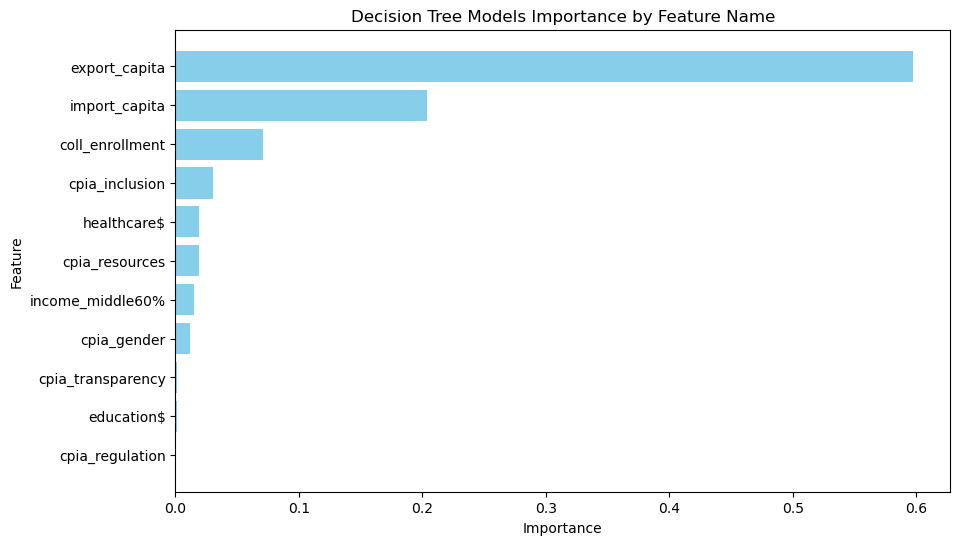

In [120]:
'''
Develop an importance_df and display importance of each feature
'''

best_model = grid_search.best_estimator_
coefficients = best_model.named_steps['log_reg'].coef_
poly_feature_names = best_model.named_steps['poly'].get_feature_names_out(input_features=feature_names)
coef_df = pd.DataFrame(coefficients, columns=poly_feature_names)
coef_df = coef_df.T
coef_df = coef_df.rename(columns={0: 'weight'})
coef_df['magnitude'] = coef_df['weight'].abs()
coef_df_sorted = coef_df.sort_values(by='magnitude', ascending=False)
coef_df_sorted.reset_index(inplace=True)
coef_df_sorted = coef_df_sorted.rename(columns={'index': 'Feature'})
sum_of_coef = coef_df_sorted['magnitude'].sum()
coef_df_sorted['Importance'] = coef_df_sorted['magnitude']/ sum_of_coef
coef_df_sorted = coef_df_sorted[~coef_df_sorted['Feature'].str.contains('1')]
coef_df_sorted = coef_df_sorted[['Feature', 'Importance']]

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(coef_df_sorted['Feature'], coef_df_sorted['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Models Importance by Feature Name')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

#### 3.2b Decision Tree
- overiview of the algorithm plus (pros/cons)

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=21)


### Initialize model
clf = DecisionTreeClassifier(random_state=21)

### setup parameter grid
param2 = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid = GridSearchCV(estimator=clf, param_grid=param2, cv=5, n_jobs=-1)

### Train the model
grid.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid.best_estimator_.predict(X_test)
y_test_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print(f'Best parameters: {grid.best_params_}')
print(f'Best cross-validation-score: {grid.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')
print(f'F1-score : {f1}')

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation-score: 0.8223169196045367
Accuracy on the test set : 0.8313679245283019
Precision on the test set : 0.7902298850574713
AUC on the test set : 0.8366294983720863
F1-score : 0.7936507936507936


#### <span style='color:blue;'>Figure XX.X</span>

#### Develop an importance_df and display importance of each feature

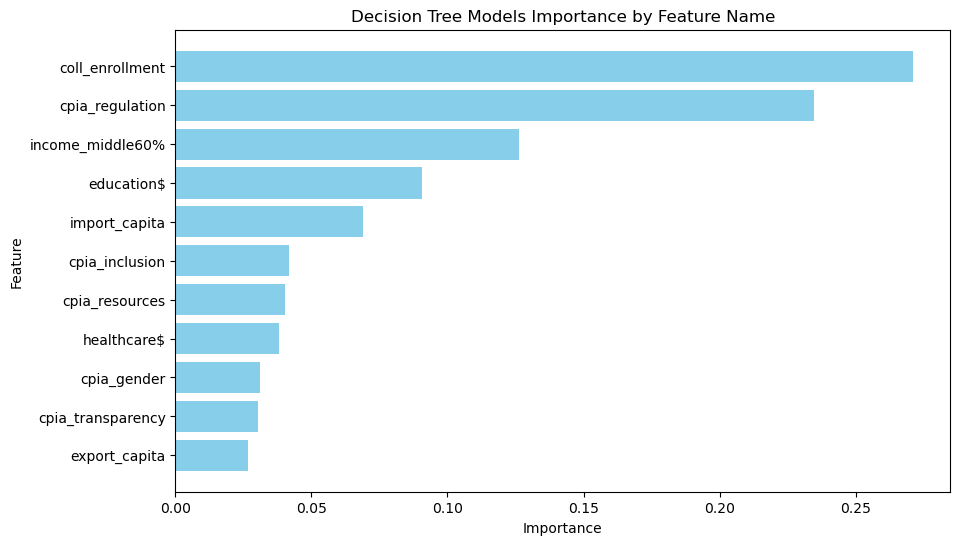

In [127]:
### get best estimator
best_model = grid.best_params_

### Initialize the Decision Tree with best params
best_clf = DecisionTreeClassifier(**best_model, random_state=21)

### Train the model
best_clf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

### create a plot of featue importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Models Importance by Feature Name')

### Display most important at the top
plt.gca().invert_yaxis()
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

#### 3.2c Random Forest
- overiview of the algorithm plus (pros/cons)

In [92]:
from sklearn.ensemble import RandomForestClassifier



### Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y_gdp, test_size=0.2, random_state=44)


### Initialize model
clf_rf = RandomForestClassifier(random_state=44)

### setup parameter grid
param3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### Initialize grid search
grid3 = GridSearchCV(estimator=clf_rf, param_grid=param3, cv=5, n_jobs=-1)

### Train the model
grid3.fit(X_train, y_train)

### Make predictions in order to get predictions for evaluations
y_test_pred = grid3.best_estimator_.predict(X_test)
y_test_pred_proba = grid3.best_estimator_.predict_proba(X_test)[:, 1]

### Calculate and display evaluation metrics for the test set
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary')
auc = roc_auc_score(y_test, y_test_pred_proba)
f1 = f1_score(y_test, y_test_pred)

### Display best paramaters and cross val score
print(f'Best parameters: {grid3.best_params_}')
print(f'Best cross-validation-score: {grid3.best_score_}')

### Display performance metrics
print(f'Accuracy on the test set : {accuracy}')
print(f'Precision on the test set : {precision}')
print(f'AUC on the test set : {auc}')
print(f'F1-score : {f1}')

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation-score: 0.8577391145213789
Accuracy on the test set : 0.8549528301886793
Precision on the test set : 0.818407960199005
AUC on the test set : 0.9445741514815669
F1-score : 0.8425096030729834


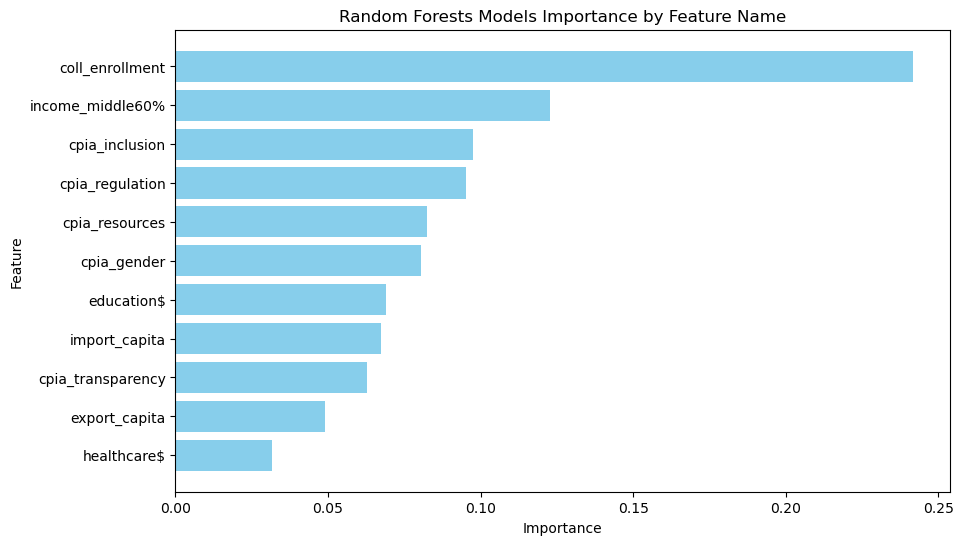

In [128]:
'''
Importance of each feature
'''
### get best estimator
best_model = grid3.best_params_

### Initialize the Decision Tree with best params
best_clf_rf = RandomForestClassifier(**best_model, random_state=21)

### Train the model
best_clf_rf.fit(X_train, y_train)

### get feature importances
feature_importances = best_clf_rf.feature_importances_    ### feature names was captured in previous study

### Create a dataframe for better visualization
importance_df2 = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df2 = importance_df2.sort_values(by='Importance', ascending=False)

### Creat a plot to show importance of each feature
plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forests Models Importance by Feature Name')

### Display plot of feature importance
plt.gca().invert_yaxis()
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

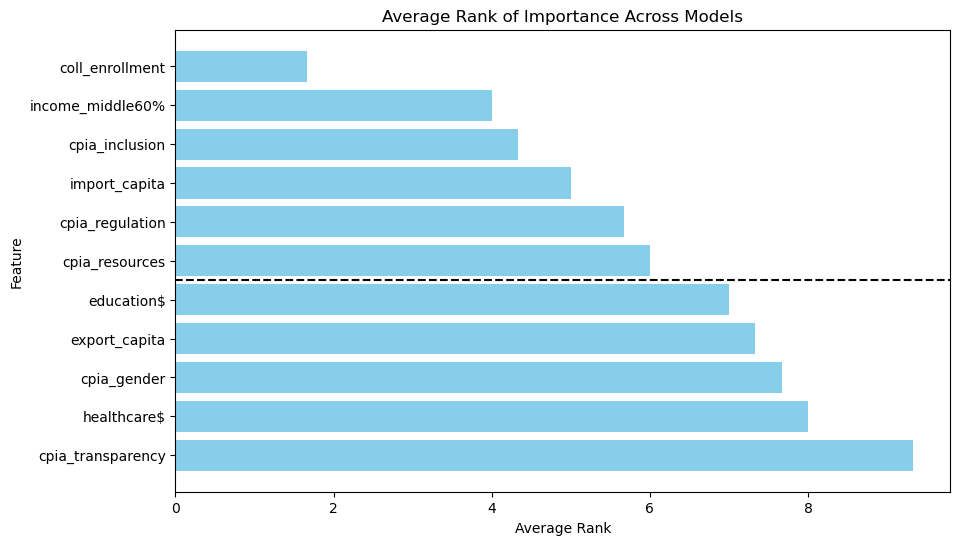

In [145]:
'''
Merge the different importance dfs and calculate plot the average Rank
'''
### Calculate and add rank for ea models results
importance_df['Rank'] = importance_df['Importance'].rank(ascending=False)
importance_df2['Rank'] = importance_df2['Importance'].rank(ascending=False)
coef_df_sorted['Rank'] = coef_df_sorted['Importance'].rank(ascending=False)

### merge importance dfs in combined df
importance_combined = pd.merge(coef_df_sorted, importance_df, on='Feature', how='inner')
importance_combined = pd.merge(importance_combined, importance_df2, on='Feature', how='inner')

### Calculate average rank
importance_combined['Avg_Rank'] = (importance_combined['Rank_x'] + importance_combined['Rank_y'] + importance_combined['Rank'])/3
importance_combined = importance_combined.sort_values(by='Avg_Rank')

plt.figure(figsize=(10, 6))
plt.barh(importance_combined['Feature'], importance_combined['Avg_Rank'], color='skyblue')
plt.xlabel('Average Rank')
plt.ylabel('Feature')
plt.title('Average Rank of Importance Across Models')
plt.gca().invert_yaxis()
plt.axhline(y=5.5, color='black', linestyle='--')
plt.show()

#### <span style='color:blue;'>Figure XX.X</span>

### Model Evaluation

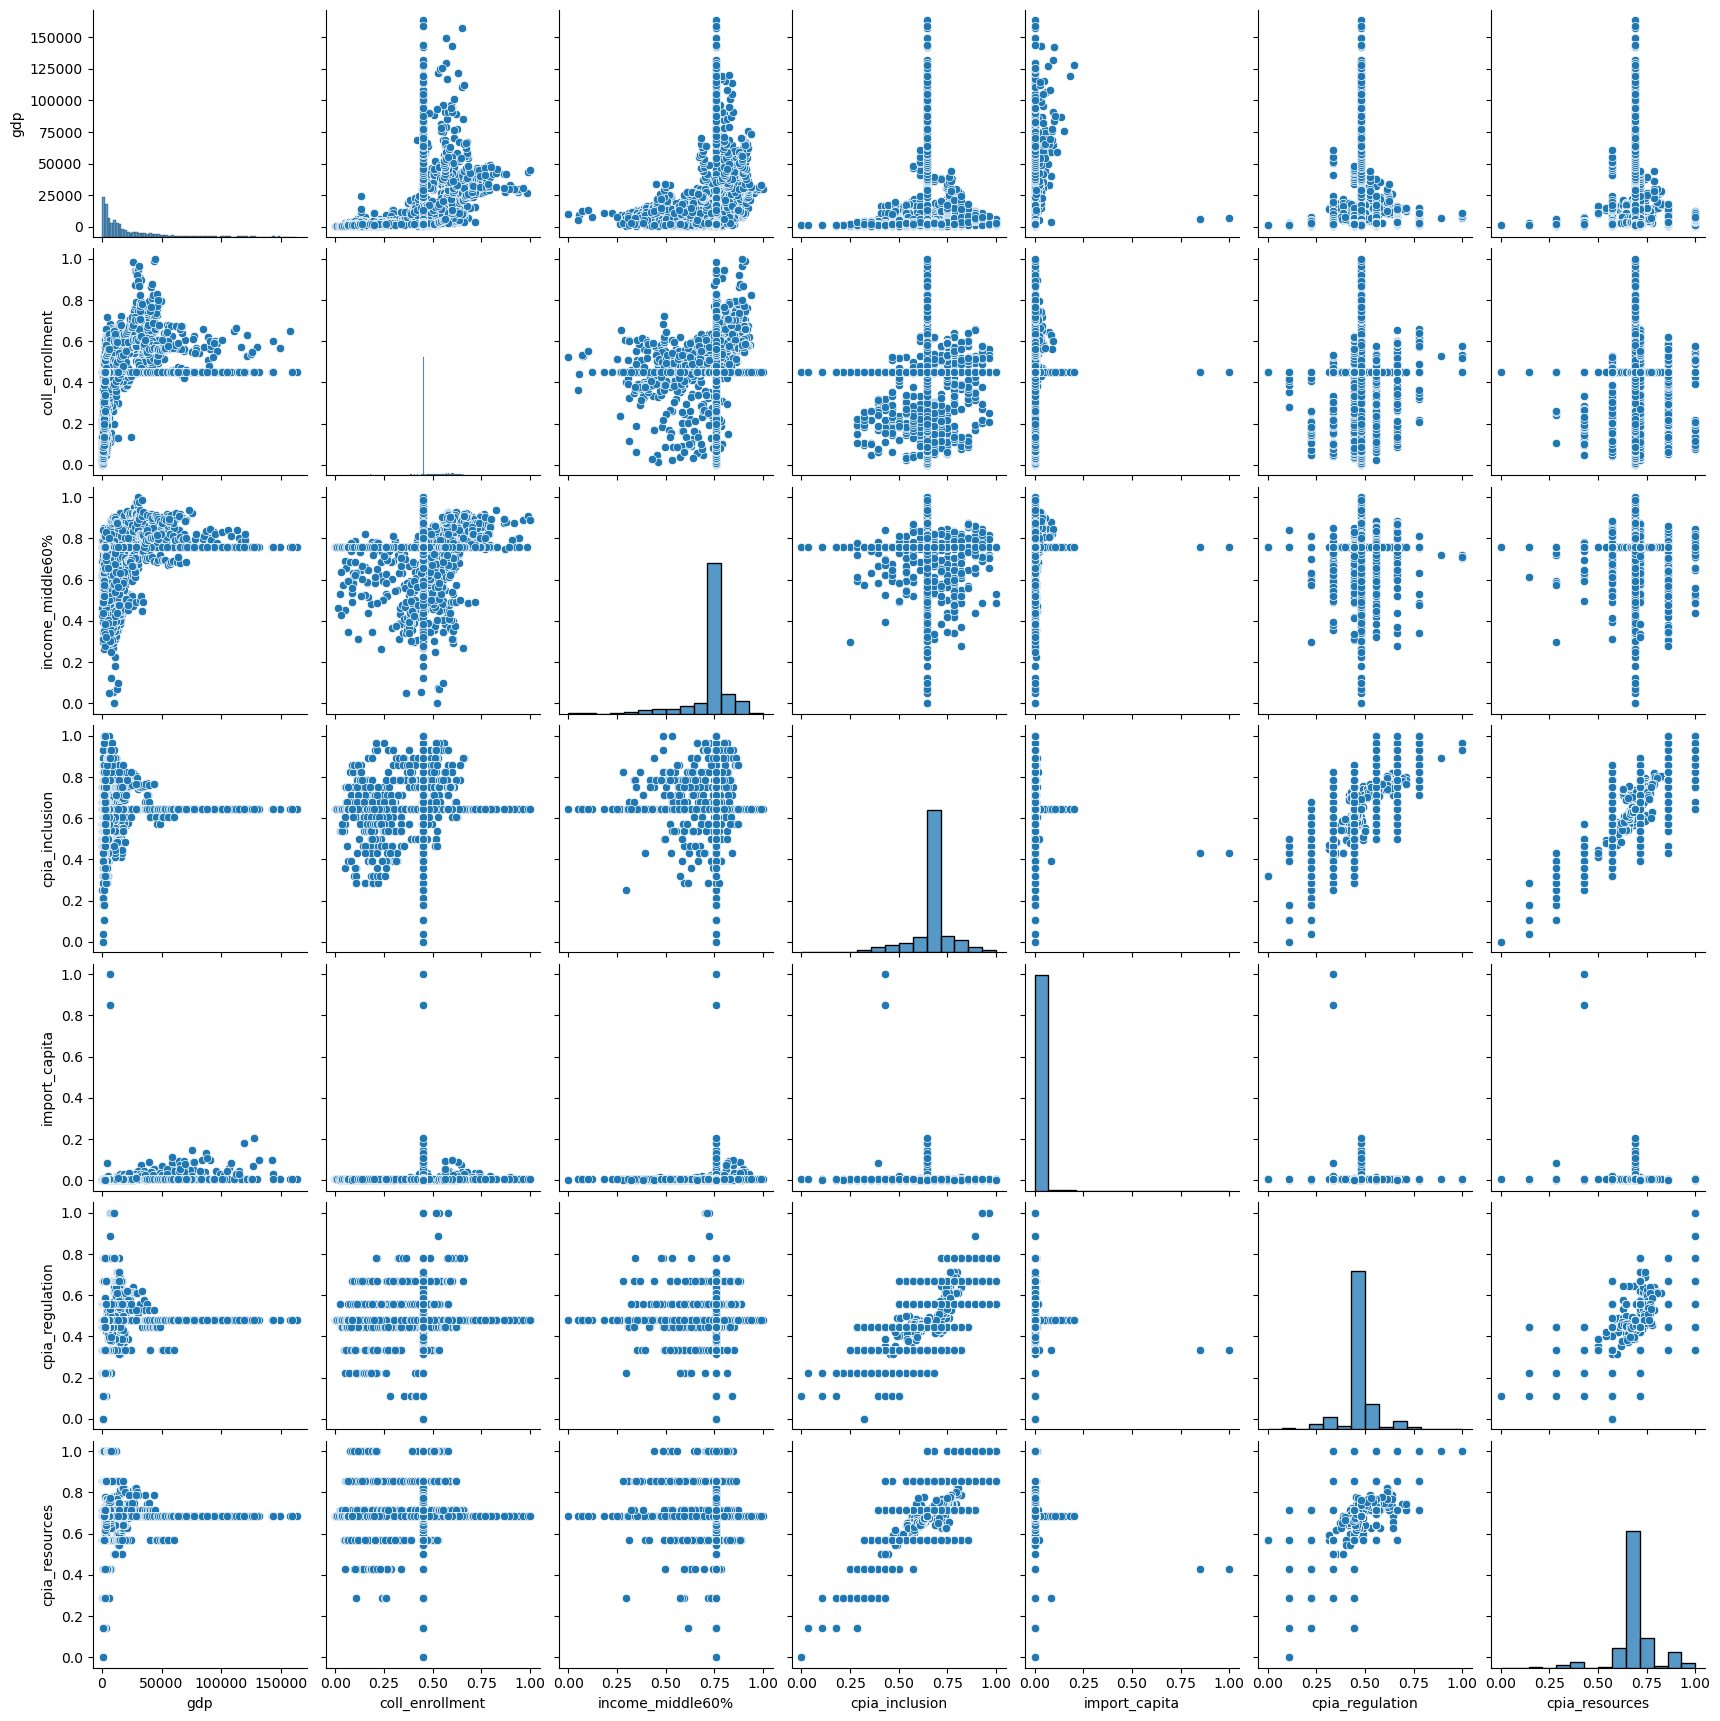

In [157]:
scaler = MinMaxScaler()

critical_df = df_gdp[['gdp', 'coll_enrollment', 'income_middle60%', 'cpia_inclusion', 'import_capita', 'cpia_regulation', 'cpia_resources']]
not_scaled = ['gdp']
scaled = ['coll_enrollment', 'income_middle60%', 'cpia_inclusion', 'import_capita', 'cpia_regulation', 'cpia_resources']

critical_df2 = critical_df
critical_df2[scaled] = scaler.fit_transform(critical_df[scaled])

critical_df2 = pd.concat([critical_df[not_scaled], critical_df2[scaled]], axis=1)


sns.pairplot(critical_df)
plt.show()

# 5. Results
- Insights
- Reccomendations

# 6. Conclusion
- Recap
- Next Steps

# Appendix
- additional information visualizations, etc